In [1]:
class Task:
    def __init__(self, task_id, items_count, max_weight, max_item_price):
        self.task_id = task_id
        self.item_count = items_count
        self.max_weight = max_weight
        self.items = [] #Item is list [weight, price]
        self.solution = None
        self.optimal_configuration = None
        self.visited_configs = 0
        self.price_sums = []
        self.max_item_price = 0
    def add_item(self, weight, price):
        self.items.append([weight, price])
    def __str__(self):
        task_str = 'Task id: ' + str(self.task_id) + ', items count: ' + str(self.item_count) + ', max weight: ' + str(self.min_price) + "\nItems: \n"
        i = 0
        for item in self.items:
            i += 1
            task_str = task_str + 'item n.' + str(i) + ', weight: ' + str(item[0]) + ' price: ' + str(item[1]) + '\n'
        return task_str
    def calculate_weight_price(self, index):
        index = (str(bin(index)))[2:]
        item_num, price, weight = 0, 0, 0
        j = self.item_count - len(index)
        for i in index:
            if i == '1':
                weight += (self.items[j])[0]
                price += (self.items[j])[1]
            j += 1
        return weight, price
    def reset(self):
        visited_configs = 0
    def calculate_price_sums(self):
        for i in range(0, self.item_count):
            sum_price = 0
            for j in range(i, self.item_count):
                sum_price += (self.items[j])[1]
            self.price_sums.append(sum_price)
    def null_heavy_items(self):
        i = 0
        for item in self.items:
            if item[0] > self.max_weight:
                self.items[i][1] = 0
            i += 1
    
class Configuration:
    def __init__(self, config_id, price):
        self.config_id = config_id
        self.price = price
        self.items = []
    def __str__(self):
        return ''

In [2]:
#Function to export task from string to object Task
def export_task(task: str):
    task_splitted = task.split(" ")
    task = Task(abs(int(task_splitted[0])), int(task_splitted[1]), int(task_splitted[2]), 0)
    for i in range (3, (task.item_count * 2) + 3, 2):
        price = int(task_splitted[i+1])
        task.add_item(int(task_splitted[i]), price)
        if price > task.max_item_price:
            task.max_item_price = price
    task.calculate_price_sums()
    task.null_heavy_items()
    return task

def export_solution(solution: str):
    solution = solution.split(" ")
    config = Configuration(abs(int(solution[0])), int(solution[2]))
    for item in solution[3:-1]:
        if item == '1': 
            config.items.append(True)
        else:
            config.items.append(False) 
    return config

def create_solution_file(task_obj_list: list, sol_file_path: str):
    f = open(sol_file_path, "w")
    
    for task in task_obj_list:
        items, price = knapsack_solver_branch(task)
        sol_str = str(task.task_id) + ' ' + str(task.item_count) + ' ' + str(price)
        for item in items:
            sol_str += ' '
            if item:
                sol_str += '1'
            else:
                sol_str += '0'
        sol_str += '\n'
        f.write(sol_str)     
    f.close()
    return
    

In [3]:
#Function which as input get file with tasks and returns list of objects Task

def read_tasks(file_name: str, solution_file: str = None):
    f = open(file_name)
    tasks_str = f.read()
    tasks_list = tasks_str.split('\n')
    tasks_list.pop()
    tasks_obj_list = []
    for task_str in tasks_list:
        task_obj = export_task(task_str)
        tasks_obj_list.append(task_obj)
    f.close()
    if solution_file:
        f2 = open(solution_file)
        solutions_str = f2.read()
        solutions_list = solutions_str.split('\n')
        solutions_list.pop()
        i = 0
        cid_last = None
        print(len(tasks_obj_list), len(solutions_list))
        for solution in solutions_list:
            configuration = export_solution(solution)
            cid = configuration.config_id - 1
            if cid == cid_last:
                continue
            cid_last = cid
            tasks_obj_list[i].optimal_configuration = configuration
            i += 1
        f2.close()    
    return tasks_obj_list


In [4]:
def knapsack_solver_brute_force(task: Task):
    item_list = []
    price = 0
    for x in range(0, task.item_count):
        item_list.append(None)
    solution, price = knapsack_solver_brute_force_rec(task, 0, item_list, 0, 0, 0, [])
    if not solution:
        empty = []
        for x in range(0, task.item_count):
            empty.append(False)
        return empty, 0
    else:
        return solution, price   
    
def knapsack_solver_brute_force_rec(task: Task, pos: int, item_list: list, weight: int, price: int, max_price: int, best: list):
    if pos == task.item_count:
        if weight <= task.max_weight:
            return item_list, price
        else:
            return None, 0
    else:
        new_weight = weight + (task.items[pos])[0]
        new_price = price + (task.items[pos])[1]
        
        new_list1 = item_list.copy()
        new_list2 = item_list.copy()
        new_list1[pos] = True
        new_list2[pos] = False
        final_list = None
        
        item_list1, max_price1 = knapsack_solver_brute_force_rec(task, pos + 1, new_list1, new_weight, new_price, max_price, best)
        if max_price1 > max_price:
            max_price = max_price1
            best = item_list1
            
        item_list2, max_price2 = knapsack_solver_brute_force_rec(task, pos + 1, new_list2, weight, price, max_price, best)
        if max_price2 > max_price:
            max_price = max_price2
            best = item_list2
        
        return best, max_price

In [5]:
def knapsack_solver_branch(task: Task):
    item_list = []
    price = 0
    for x in range(0, task.item_count):
        item_list.append(None)
    solution, price = knapsack_solver_branch_rec(task, 0, item_list, 0, 0, 0, [])
    if not solution:
        empty = []
        for x in range(0, task.item_count):
            empty.append(False)
        return empty, 0
    else:
        return solution, price

def knapsack_solver_branch_rec(task: Task, pos: int, item_list: list, weight: int, price: int, max_price: int, best: list):
    if pos == task.item_count:
        if weight <= task.max_weight:
            return item_list, price
        else:
            return None, 0
    else:
        new_weight = weight + (task.items[pos])[0]
        new_price = price + (task.items[pos])[1]
        
        if weight > task.max_weight: 
            return None, 0
        if (price + task.price_sums[pos]) < max_price:
            return None, 0
        
        new_list1 = item_list.copy()
        new_list2 = item_list.copy()
        new_list1[pos] = True
        new_list2[pos] = False
        final_list = None
        
        item_list1, max_price1 = knapsack_solver_branch_rec(task, pos + 1, new_list1, new_weight, new_price, max_price, best)
        if max_price1 > max_price:
            max_price = max_price1
            best = item_list1
            
        item_list2, max_price2 = knapsack_solver_branch_rec(task, pos + 1, new_list2, weight, price, max_price, best)
        if max_price2 > max_price:
            max_price = max_price2
            best = item_list2
        
        return best, max_price

In [6]:
def knapsack_solver_dynamic(task: Task):
    price_table = list()
    for i in range(0, task.item_count):
        empty = [None] * (task.max_item_price * task.item_count)
        price_table.append(empty)
    idx_list = [0]
    price_table[0][0] = [0, []]
    best_price = 0
    items = [False] * task.item_count
    
    for n in range(0, task.item_count):
        idx_list_new = []
        for idx in idx_list:
            w = price_table[n][idx][0]
            p = idx
            w_new = w + task.items[n][0]
            p_new = p + task.items[n][1]
            item_list = price_table[n][idx][1]
            item_list1 = item_list.copy()
            item_list1.append(True)
            item_list2 = item_list.copy()
            item_list2.append(False)
            
            for w, p, item_list in [[w, p, item_list2], [w_new, p_new, item_list1]]:
                if w > task.max_weight:
                    continue
                if len(item_list) == task.item_count:
                    if p > best_price:
                        best_price = p
                        items = item_list
                    continue
                if price_table[n+1][p]:
                    if w < price_table[n+1][p][0]:
                         price_table[n+1][p] = [w, item_list]
                    else:
                        continue
                else:
                    idx_list_new.append(p)
                    price_table[n+1][p] = [w, item_list]
                    
        idx_list = idx_list_new.copy()
        
    return items, best_price

In [7]:
def sort_items_by_heuristic(items: list) -> list:
    sorted_items = sorted(items, key=lambda x: x[1] / x[0], reverse=True)
    return sorted_items

def knapsack_solver_heuristic(task: Task):
    sorted_items  = sort_items_by_heuristic(task.items)
    knapsack = []
    price = 0
    weight = 0
    n = 0
    
    while(n < task.item_count):
        weight += sorted_items[n][0]
        if weight > task.max_weight:
            break
        price += sorted_items[n][1]
        knapsack.append(sorted_items[n])
        n = n+1
        
    return knapsack, price

def knapsack_solver_heuristic_redux(task: Task):
    knapsack1, price1 = knapsack_solver_heuristic(task)
    
    price2 = 0
    knapsack2 = []
    items = task.items.copy()
    for x in items:
        if x[0] <= task.max_weight:
            if price2 < x[1]:
                price2 = x[1]
                knapsack2 = [x]
    
    if price1 >= price2:
        return knapsack1, price1 
    else:
        return knapsack2, price2

In [8]:
from math import log2, floor
from copy import deepcopy

def knapsack_solver_fptas(task: Task, err: float):
    if err > 1 or err < 0:
        raise ValueError('Hodnota err musí být mezi 0 a 1', err)
    if err == 0:
        bits = 0
    else:
        bits = floor(log2((err * task.max_item_price) / task.item_count))
    
    new_task = deepcopy(task)
    for i in range(0, new_task.item_count):
        new_task.items[i][1] = max(new_task.items[i][1] >> bits, 1)
    new_task.price_sums = []
    new_task.calculate_price_sums()
    new_task.max_item_price = new_task.max_item_price >> bits
    knapsack, price = knapsack_solver_dynamic(new_task)
    price = 0
    j = 0
    for item in knapsack:
        if item:
            price += task.items[j][1]
        j += 1
        
    return knapsack, price

In [9]:
import re

def export_time(time_str: str) -> float: # Convert time to ms
    i = 0
    val_str = ''
    while re.match('[0-9.]', time_str[i]):
        val_str += time_str[i]
        i += 1
    val = float(val_str)
    
    s_index = time_str.find('s')
    unit = time_str[i+1:s_index+1]
    if unit == 'ns':
        val = val/1000000
    elif unit == 'µs':
        val = val/1000
    elif unit == 's':
        val = val * 1000
    
    return val

def calculate_relative_error(result: float, solution: float) -> float:
    if result == solution:
        return 0
    if solution == 0:
        return 100
    err =  1 - (result / solution)
    return err * 100

In [10]:
from typing import Callable
import timeit

    
def run_solver(task_file: str, repeat_num: int, solver: Callable, solution_file: str = None, error = -1, best = False):
    tasks = read_tasks(task_file, solution_file)
    same = 0
    different = 0
    elapsed_time = -1
    time_sum = 0
    max_time = None
    best_time = None
    err_sum = 0
    err_max = 0
    err_min = None

    for task in tasks:
        if error == -1:
            solution, price = solver(task)
            if best:
                elapsed_time =  %timeit -o -n 50 -r 20 solver(task)
            else:
                elapsed_time =  %timeit -o -n 5 -r 2 solver(task)
        else:
            solution, price = solver(task, error)
            elapsed_time =  %timeit -o -n 5 -r 2 solver(task, error)
        elapsed_time = export_time(str(elapsed_time))
        if price == task.optimal_configuration.price or not (solution_file):
            same += 1
        else:
            print(task.task_id, task.max_weight, solution, task.optimal_configuration.items, price, task.optimal_configuration.price)
            different += 1
        
        if not max_time:
            max_time = elapsed_time
        else:
            if elapsed_time > max_time:
                max_time = elapsed_time
        if not best_time:
            best_time = elapsed_time
        else:
            if elapsed_time < best_time:
                best_time = elapsed_time
                
        time_sum += elapsed_time
        err = calculate_relative_error(price, task.optimal_configuration.price)
        if err > (error * 100):
            print('error', err)
            print(task.task_id, task.max_weight, solution, task.optimal_configuration.items, price, task.optimal_configuration.price)
        err_sum += err
        if err > err_max:
            err_max = err
        if not err_min:
            err_min = err
        else:
            if err < err_min:
                err_min = err
        task.reset()
        
    sucess_rate = (same / len(tasks)) * 100
    avg_time = time_sum / len(tasks) 
    err_avg = err_sum / len(tasks)
    if best:
        return sucess_rate, avg_time, max_time, best_time, err_avg, err_max, err_min
    else:
        return sucess_rate, avg_time, max_time, err_avg, err_max

def run_solver_get_values(task_file: str, repeat_num: int, solver: Callable):
    tasks = read_tasks(task_file)
    visited_configs_list = [] 
    i = 0
    for task in tasks:
        #print(i+1, '/', len(tasks))
        i = i+1
        elapsed_time =  %timeit -o -n 5 -r 4 solver(task)
        elapsed_time = export_time(str(elapsed_time))
        visited_configs_list.append(elapsed_time)
        task.reset()
    return visited_configs_list

In [11]:
#run_solver("./ZR/ZR15_inst.dat", 1, sack_problem_solver_brute_force, "./ZR/ZK15_sol.dat")
#run_solver("./ZR/ZR15_inst.dat", 1, sack_problem_solver_branch_method_only_weight, "./ZR/ZK15_sol.dat")
#run_solver("./ZR/ZR15_inst.dat", 1, sack_problem_solver_branch_method_only_price, "./ZR/ZK15_sol.dat")
#run_solver("./ZR/ZR15_inst.dat", 1, sack_problem_solver_branch_method, "./ZR/ZK15_sol.dat")

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def make_histo(file: str, bins: int, name: str = '', solver: Callable = None):
    values = run_solver_get_values(file, 1, solver)
    num_bins = bins
    print(values)
    n, bins, patches = plt.hist(values, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Průměrný čas běhu')
    plt.ylabel('Počet instancí')
    plt.title(name)

    plt.show()
    return

#make_histo("./ZR/ZR20_inst.dat", 12, 'Histogram četnosti jednotlivých hodnot pro n=20')


In [13]:
from tabulate import tabulate

def test_algorithms(create_ratio_tables: bool = False, create_korr_tables: bool = False, create_granularity_tables: bool = False, create_perm_tables: bool = False):
    algorithms = [knapsack_solver_branch, knapsack_solver_dynamic, knapsack_solver_heuristic]
    algorithms_str = ['Branch method', 'Dynamic programming', 'Greedy Heuristic']
    max_list = []
    avg_list = []
    

    if create_ratio_tables:
        wp_list = ['100, 1000', '1000, 1000', '10000, 1000', '100, 100', '100, 1000', '100, 10000']
        tables = [[], [], []]
        algorithms = [knapsack_solver_brute_force, knapsack_solver_branch, knapsack_solver_dynamic]
        algorithms_str = ['brute force', 'branch method', 'dynamic programming']
        for i in range(0, len(algorithms)):
            for j in range(1,7):
                task_files = []
                sol_files = []
                for k in range(1,6):
                    task_files.append("files/ratio/test" + str(j) + str(k) + '.dat')
                    sol_files.append("files/ratio/test" + str(j) + str(k) + '_sol.dat')
                acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, algorithms[i], sol_files[0])
                acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, algorithms[i], sol_files[1])
                acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, algorithms[i], sol_files[2])
                acc4, avgt4, maxt4, avge4, maxe4 = run_solver(task_files[3], 1, algorithms[i], sol_files[3])
                acc5, avgt5, maxt5, avge5, maxe5 = run_solver(task_files[4], 1, algorithms[i], sol_files[4])
                tables[i].append([wp_list[j-1], round(avgt1, 2), round(avgt2, 2), round(avgt3, 2), round(avgt4, 2), round(avgt5, 2)])
                with open('tables_ratio.txt', 'a', encoding="utf-8") as f:
                    f.write(algorithms_str[i] +'\n')
                    f.write(tabulate(tables[i], headers = ["Max W, Max P", 'r=0.01', 'r=0.03', 'r=0.1', 'r=0.3', 'r=0.9'], tablefmt = 'fancy_grid') + '\n')
                    
        table = []
        for j in range(1,7):
            task_files = []
            sol_files = []
            for k in range(1,6):
                task_files.append("files/ratio/test" + str(j) + str(k) + '.dat')
                sol_files.append("files/ratio/test" + str(j) + str(k) + '_sol.dat') 
            acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, knapsack_solver_heuristic_redux, sol_files[0])
            acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, knapsack_solver_heuristic_redux, sol_files[1])
            acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, knapsack_solver_heuristic_redux, sol_files[2])
            acc4, avgt4, maxt4, avge4, maxe4 = run_solver(task_files[3], 1, knapsack_solver_heuristic_redux, sol_files[3])
            acc5, avgt5, maxt5, avge5, maxe5 = run_solver(task_files[4], 1, knapsack_solver_heuristic_redux, sol_files[4])
            table.append([wp_list[j-1], round(avge1, 2), round(avge2, 2), round(avge3, 2), round(avge4, 2), round(avge5, 2)])
            with open('tables_ratio.txt', 'a', encoding="utf-8") as f:
                f.write('Greedy heuristic' +'\n')
                f.write(tabulate(table, headers = ["Max W, Max P", 'r=0.01', 'r=0.03', 'r=0.1', 'r=0.3', 'r=0.9'], tablefmt = 'fancy_grid') + '\n')
    
    if create_korr_tables:
        tables = [[], [], []]
        algorithms = [knapsack_solver_brute_force, knapsack_solver_branch, knapsack_solver_dynamic]
        algorithms_str = ['brute force', 'branch method', 'dynamic programming']
        first_col_values = ['r=0.01', 'r=0.1', 'r=0.9', 'max W=100', 'max W=10000', 'max P=100', 'max P=10000']
        for i in range(0, len(algorithms)):
            for j in range(1, 8):
                task_files = []
                sol_files = []
                for k in range(1,4):
                    task_files.append("files/korr/test" + str(j) + str(k) + '.dat')
                    sol_files.append("files/korr/test" + str(j) + str(k) + '_sol.dat') 
                acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, algorithms[i], sol_files[0])
                acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, algorithms[i], sol_files[1])
                acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, algorithms[i], sol_files[2])
                tables[i].append([first_col_values[j-1], round(avgt1, 2), round(avgt2, 2), round(avgt3, 2)])
                with open('tables_korr.txt', 'a', encoding="utf-8") as f:
                    f.write(algorithms_str[i] +'\n')
                    f.write(tabulate(tables[i], headers = ["", 'c=uni', 'c=corr', 'c=strong'], tablefmt = 'fancy_grid') + '\n')
        
        table = []
        for j in range(1, 8):
            task_files = []
            sol_files = []
            for k in range(1,4):
                task_files.append("files/korr/test" + str(j) + str(k) + '.dat')
                sol_files.append("files/korr/test" + str(j) + str(k) + '_sol.dat') 
                
            acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, knapsack_solver_heuristic_redux, sol_files[0])
            acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, knapsack_solver_heuristic_redux, sol_files[1])
            acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, knapsack_solver_heuristic_redux, sol_files[2])
            table.append([first_col_values[j-1], round(avge1, 2), round(avge2, 2), round(avge3, 2)])
            with open('tables_korr.txt', 'a', encoding="utf-8") as f:
                f.write('Greedy heuristic' +'\n')
                f.write(tabulate(table, headers = ["", 'c=uni', 'c=corr', 'c=strong'], tablefmt = 'fancy_grid') + '\n')
                
    if create_granularity_tables:
        tables = [[], [], []]
        algorithms = [knapsack_solver_brute_force, knapsack_solver_branch, knapsack_solver_dynamic]
        algorithms_str = ['brute force', 'branch method', 'dynamic programming']
        first_col_values = ['k=0', 'light k=0.2', 'light k=0.5', 'light k=1', 'light k=3', 'light k=6', 'heavy k=0.2', 'heavy k=0.5', 'heavy k=1', 'heavy k=3', 'heavy k=6']
        for i in range(0, len(algorithms)):
            for j in range(1, 12):
                task_files = []
                sol_files = []
                for k in range(1,5):
                    task_files.append("files/granularity/test" + str(j) + str(k) + '.dat')
                    sol_files.append("files/granularity/test" + str(j) + str(k) + '_sol.dat') 
                acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, algorithms[i], sol_files[0])
                acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, algorithms[i], sol_files[1])
                acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, algorithms[i], sol_files[2])
                acc4, avgt4, maxt4, avge4, maxe4 = run_solver(task_files[3], 1, algorithms[i], sol_files[3])
                tables[i].append([first_col_values[j-1], round(avgt1, 2), round(avgt2, 2), round(avgt3, 2), round(avgt4, 2)])
                with open('tables_granularity.txt', 'a', encoding="utf-8") as f:
                    f.write(algorithms_str[i] +'\n')
                    f.write(tabulate(tables[i], headers = ["item distribution", 'n=8', 'n=10', 'n=12', 'n=14'], tablefmt = 'fancy_grid') + '\n')
                    
        
        table = []
        for j in range(1, 12):
            task_files = []
            sol_files = []
            for k in range(1,5):
                task_files.append("files/granularity/test" + str(j) + str(k) + '.dat')
                sol_files.append("files/granularity/test" + str(j) + str(k) + '_sol.dat') 
            acc1, avgt1, maxt1, avge1, maxe1 = run_solver(task_files[0], 1, knapsack_solver_heuristic_redux, sol_files[0])
            acc2, avgt2, maxt2, avge2, maxe2 = run_solver(task_files[1], 1, knapsack_solver_heuristic_redux, sol_files[1])
            acc3, avgt3, maxt3, avge3, maxe3 = run_solver(task_files[2], 1, knapsack_solver_heuristic_redux, sol_files[2])
            acc4, avgt4, maxt4, avge4, maxe4 = run_solver(task_files[3], 1, knapsack_solver_heuristic_redux, sol_files[3])
            table.append([first_col_values[j-1], round(avge1, 2), round(avge2, 2), round(avge3, 2), round(avge4, 2)])
            with open('tables_granularity.txt', 'a', encoding="utf-8") as f:
                f.write('Greedy heuristic' +'\n')
                f.write(tabulate(table, headers = ["item distribution", 'n=8', 'n=10', 'n=12', 'n=14'], tablefmt = 'fancy_grid') + '\n')
    
    if create_perm_tables:
        tables = [[], [], []]
        algorithms = [knapsack_solver_brute_force, knapsack_solver_branch, knapsack_solver_dynamic]
        algorithms_str = ['brute force', 'branch method', 'dynamic programming']
        first_col_values = ['n=10, set1', 'n=10, set2', 'n=10, set3', 'n=12, set1', 'n=12, set2', 'n=12, set3', 'n=14, set1', 'n=14, set2', 'n=14, set3']
        """ 
        for i in range(0, len(algorithms)):
            for j in range(1, 10):
                task_file = "files/perm/test" + str(j) + '.dat'
                sol_file = "files/perm/test" + str(j) + '_sol.dat' 
                acc, avgt, maxt, mint, avge, maxe, mine = run_solver(task_file, 1, algorithms[i], sol_file, best=True)
                diff = (1 - (mint / maxt)) * 100
                diff = str(round(diff, 2)) + ' %'
                tables[i].append([first_col_values[j-1], round(avgt, 2), round(mint, 2), round(maxt, 2), diff])
                with open('tables_perm.txt', 'a', encoding="utf-8") as f:
                    f.write(algorithms_str[i] +'\n')
                    f.write(tabulate(tables[i], headers = ["data set", 'avg t', 'min t', 'max t', 'max diff'], tablefmt = 'fancy_grid') + '\n')
        """
        table = []
        for j in range(1, 10):
            task_file = "files/perm/test" + str(j) + '.dat'
            sol_file = "files/perm/test" + str(j) + '_sol.dat' 
            acc, avgt, maxt, mint, avge, maxe, mine = run_solver(task_file, 1, knapsack_solver_heuristic_redux, sol_file, best=True)
            if maxe == 0:
                diff = 0
            else:
                diff = (1 - (mine / maxe)) * 100
            diff = str(round(diff, 2)) + ' %'
            table.append([first_col_values[j-1], round(avge, 2), round(mine, 2), round(maxe, 2), diff])
            with open('tables_perm.txt', 'a', encoding="utf-8") as f:
                f.write('Greedy heuristic' +'\n')
                f.write(tabulate(table, headers = ["data set", 'avg t', 'min t', 'max t', 'max diff'], tablefmt = 'fancy_grid') + '\n')              

    return



20.9 ms ± 2.31 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.7 ms ± 454 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.6 ms ± 319 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.9 ms ± 718 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
24.3 ms ± 4.18 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
24.1 ms ± 3.72 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.9 ms ± 514 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.2 ms ± 530 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.8 ms ± 1.08 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 458 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.2 ms ± 447 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
22.3 ms ± 3.13 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.1 ms ± 737 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 305 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.9 ms ± 3.3 ms per loop (me

19.5 ms ± 859 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.8 ms ± 509 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.7 ms ± 3.11 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.8 ms ± 409 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19 ms ± 970 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.4 ms ± 209 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
21.7 ms ± 2.43 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.6 ms ± 310 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.6 ms ± 1.15 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.6 ms ± 655 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
22.3 ms ± 3.79 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
24.2 ms ± 3.15 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
22.6 ms ± 4.14 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.9 ms ± 258 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.8 ms ± 409 µs per loop (mea

19 ms ± 999 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.9 ms ± 327 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 269 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
21 ms ± 2.62 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 453 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.7 ms ± 802 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
21 ms ± 2.83 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.9 ms ± 385 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.4 ms ± 534 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 1.05 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 1.89 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.1 ms ± 831 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.8 ms ± 311 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.3 ms ± 2.07 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 502 µs per loop (mean ± s

18.7 ms ± 867 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.1 ms ± 624 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 641 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 543 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.9 ms ± 1.22 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 476 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19 ms ± 851 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.6 ms ± 811 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19 ms ± 587 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.1 ms ± 1.26 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 847 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.9 ms ± 926 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.2 ms ± 1.29 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
24.9 ms ± 5.74 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
21.7 ms ± 3.91 ms per loop (mean ±

21.3 ms ± 3.65 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
28.1 ms ± 5.54 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.9 ms ± 435 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
21 ms ± 909 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 970 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.7 ms ± 1.1 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.5 ms ± 2.2 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.5 ms ± 1.14 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.4 ms ± 1.38 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19 ms ± 1.16 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.6 ms ± 1.05 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.7 ms ± 1.68 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.2 ms ± 1.13 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 969 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.4 ms ± 743 µs per loop (mea

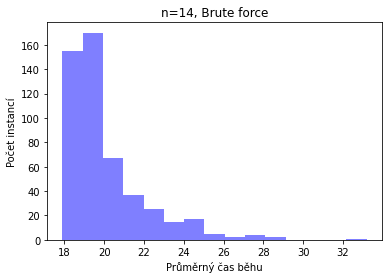

1.22 ms ± 120 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
1.52 ms ± 94.5 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.56 ms ± 246 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.09 ms ± 305 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
7.38 ms ± 919 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
10.4 ms ± 2.77 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.37 ms ± 225 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
10.3 ms ± 1.64 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.7 ms ± 3.44 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
12.1 ms ± 408 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
4.12 ms ± 478 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.72 ms ± 89.9 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
742 µs ± 63 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
6.65 ms ± 174 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.12 ms ± 170 µs per loop (mean

5.81 ms ± 431 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2 ms ± 269 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
11.2 ms ± 1.21 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.57 ms ± 163 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.14 ms ± 212 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
9.09 ms ± 849 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
7.46 ms ± 507 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
11.8 ms ± 749 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
9.51 ms ± 1.04 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
12.8 ms ± 4.5 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
4.27 ms ± 202 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
9.55 ms ± 3.35 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
8.74 ms ± 3.71 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.8 ms ± 4.29 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.19 ms ± 218 µs per loop (mean 

14.7 ms ± 1.08 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
1.56 ms ± 112 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.27 ms ± 102 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
1.19 ms ± 48.1 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
8.32 ms ± 520 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
11.3 ms ± 3.94 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.8 ms ± 589 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.62 ms ± 345 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
8.44 ms ± 1.6 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
25.7 ms ± 6.43 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.3 ms ± 6.89 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
7.19 ms ± 494 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
10.7 ms ± 2.19 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
8.98 ms ± 643 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
7.71 ms ± 569 µs per loop (me

6.74 ms ± 781 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.24 ms ± 91.6 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
6.38 ms ± 344 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
29.4 ms ± 4.08 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.47 ms ± 862 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.98 ms ± 1.03 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
21.9 ms ± 7.55 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.24 ms ± 375 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.06 ms ± 115 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
1.96 ms ± 205 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.48 ms ± 276 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.2 ms ± 1.37 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
11.6 ms ± 563 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
785 µs ± 52.9 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
3.33 ms ± 346 µs per loop (me

17.2 ms ± 1.42 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
22.7 ms ± 1.15 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
2.58 ms ± 240 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.78 ms ± 213 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
648 µs ± 33.3 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
9.78 ms ± 512 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
4.3 ms ± 77.8 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
10.6 ms ± 476 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
4.3 ms ± 475 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.02 ms ± 420 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
1.77 ms ± 161 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
5.68 ms ± 98.6 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.1 ms ± 385 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
4.94 ms ± 482 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
42.9 ms ± 5.91 ms per loop (mean

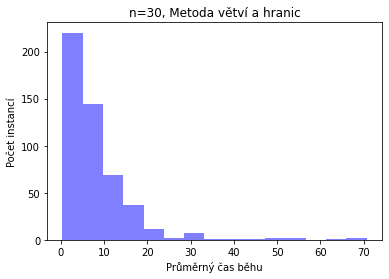

16.1 ms ± 791 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.1 ms ± 451 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.2 ms ± 930 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.7 ms ± 637 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16 ms ± 1.3 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.8 ms ± 4 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.5 ms ± 802 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.8 ms ± 946 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.4 ms ± 347 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19 ms ± 3.92 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.7 ms ± 2.09 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.7 ms ± 1.23 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.5 ms ± 547 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.9 ms ± 276 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
22.3 ms ± 4.13 ms per loop (mean ± st

18 ms ± 658 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.4 ms ± 909 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.7 ms ± 364 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.8 ms ± 857 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.7 ms ± 1.99 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.1 ms ± 1.39 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.1 ms ± 605 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.9 ms ± 545 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.2 ms ± 1.3 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
24.1 ms ± 5.04 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
25.5 ms ± 4.99 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.2 ms ± 718 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.7 ms ± 468 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16 ms ± 394 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.8 ms ± 732 µs per loop (mean ± 

27.4 ms ± 8.8 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
21.9 ms ± 3.53 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.7 ms ± 539 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.1 ms ± 1.28 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.5 ms ± 581 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.7 ms ± 1.95 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.8 ms ± 608 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.6 ms ± 797 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.5 ms ± 551 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.7 ms ± 1.06 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
15 ms ± 870 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.5 ms ± 1.28 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.7 ms ± 389 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.3 ms ± 598 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.9 ms ± 424 µs per loop (mean

19.5 ms ± 436 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
20.1 ms ± 389 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18 ms ± 720 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.5 ms ± 1.93 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.3 ms ± 407 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.7 ms ± 2.36 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
13.7 ms ± 271 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.1 ms ± 160 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.9 ms ± 1.01 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.2 ms ± 701 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.4 ms ± 1.06 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.2 ms ± 721 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.1 ms ± 533 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
12.9 ms ± 133 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.2 ms ± 1.93 ms per loop (mean

16 ms ± 577 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.4 ms ± 643 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16 ms ± 593 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17 ms ± 2.65 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.7 ms ± 535 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
16.9 ms ± 837 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.3 ms ± 240 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
13.4 ms ± 133 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
15.9 ms ± 676 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
17.6 ms ± 498 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
21.4 ms ± 3.54 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.4 ms ± 1.38 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)
18.1 ms ± 648 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
14.1 ms ± 604 µs per loop (mean ± std. dev. of 4 runs, 5 loops each)
19.2 ms ± 3.59 ms per loop (mean ± st

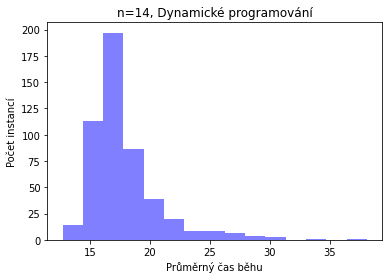

In [14]:
make_histo("files/perm/tes_histo1.dat", 15, "n=14, Brute force", knapsack_solver_brute_force)
make_histo("files/perm/tes_histo2.dat", 15, 'n=30, Metoda větví a hranic', knapsack_solver_branch)
make_histo("files/perm/tes_histo1.dat", 15, 'n=14, Dynamické programování', knapsack_solver_dynamic)


In [15]:
def create_sol_files(dir_name: str, max_i: int, max_j: int):
    completed = 0
    for i in range(1,max_i+1):
        for j in range (1,max_j+1):
            tasks = read_tasks("files/" + dir_name + "/test" + str(i) + str(j) + ".dat")
            create_solution_file(tasks, 'files/' + dir_name + '/test' + str(i) + str(j) + '_sol.dat')
            completed += 1
            print('completed: ' + str(completed) + '/' + str(max_i* max_j))

In [16]:
# Soubory na testování poměr cena a váha
'''
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 100 -C 1000 > ../files/ratio/test11.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 100 -C 1000 > ../files/ratio/test12.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 100 -C 1000 > ../files/ratio/test13.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 100 -C 1000 > ../files/ratio/test14.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 > ../files/ratio/test15.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 > ../files/ratio/test21.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 1000 -C 1000 > ../files/ratio/test22.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 > ../files/ratio/test23.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 1000 -C 1000 > ../files/ratio/test24.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 > ../files/ratio/test25.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 10000 -C 1000 > ../files/ratio/test31.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 10000 -C 1000 > ../files/ratio/test32.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 10000 -C 1000 > ../files/ratio/test33.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 10000 -C 1000 > ../files/ratio/test34.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 10000 -C 1000 > ../files/ratio/test35.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 100 -C 100 > ../files/ratio/test41.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 100 -C 100 > ../files/ratio/test42.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 100 -C 100 > ../files/ratio/test43.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 100 -C 100 > ../files/ratio/test44.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 100 > ../files/ratio/test45.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 100 -C 1000 > ../files/ratio/test51.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 100 -C 1000 > ../files/ratio/test52.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 100 -C 1000 > ../files/ratio/test53.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 100 -C 1000 > ../files/ratio/test54.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 > ../files/ratio/test55.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 100 -C 10000 > ../files/ratio/test61.dat
kg2 -n 15 -N 1000 -m 0.02,0.04 -W 100 -C 10000 > ../files/ratio/test62.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 100 -C 10000 > ../files/ratio/test63.dat
kg2 -n 15 -N 1000 -m 0.2,0.4 -W 100 -C 10000 > ../files/ratio/test64.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 10000 > ../files/ratio/test65.dat
'''
#create_sol_files('ratio', 6, 5)

'\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 100 -C 1000 > ../files/ratio/test11.dat\nkg2 -n 15 -N 1000 -m 0.02,0.04 -W 100 -C 1000 > ../files/ratio/test12.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 100 -C 1000 > ../files/ratio/test13.dat\nkg2 -n 15 -N 1000 -m 0.2,0.4 -W 100 -C 1000 > ../files/ratio/test14.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 > ../files/ratio/test15.dat\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 > ../files/ratio/test21.dat\nkg2 -n 15 -N 1000 -m 0.02,0.04 -W 1000 -C 1000 > ../files/ratio/test22.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 > ../files/ratio/test23.dat\nkg2 -n 15 -N 1000 -m 0.2,0.4 -W 1000 -C 1000 > ../files/ratio/test24.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 > ../files/ratio/test25.dat\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 10000 -C 1000 > ../files/ratio/test31.dat\nkg2 -n 15 -N 1000 -m 0.02,0.04 -W 10000 -C 1000 > ../files/ratio/test32.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 10000 -C 1000 > ../files/ratio/test33.dat\nkg2 -n 15 -N 1000

In [17]:
# Soubory na testování korelace mezi cenou a váhou
"""
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c uni > ../files/korr/test11.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c corr > ../files/korr/test12.dat
kg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c strong > ../files/korr/test13.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c uni > ../files/korr/test21.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c corr > ../files/korr/test22.dat
kg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c strong > ../files/korr/test23.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c uni > ../files/korr/test31.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c corr > ../files/korr/test32.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c strong > ../files/korr/test33.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c uni > ../files/korr/test41.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c corr > ../files/korr/test42.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c strong > ../files/korr/test43.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 10000 -C 1000 -c uni > ../files/korr/test51.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 10000 -C 1000 -c corr > ../files/korr/test52.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 10000 -C 1000 -c strong > ../files/korr/test53.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 100 -c uni > ../files/korr/test61.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 100 -c corr > ../files/korr/test62.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 100 -c strong > ../files/korr/test63.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 10000 -c uni > ../files/korr/test71.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 10000 -c corr > ../files/korr/test72.dat
kg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 10000 -c strong > ../files/korr/test73.dat
"""

#create_sol_files('korr', 7, 3)

'\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c uni > ../files/korr/test11.dat\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c corr > ../files/korr/test12.dat\nkg2 -n 15 -N 1000 -m 0.005,0.015 -W 1000 -C 1000 -c strong > ../files/korr/test13.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c uni > ../files/korr/test21.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c corr > ../files/korr/test22.dat\nkg2 -n 15 -N 1000 -m 0.08,0.12 -W 1000 -C 1000 -c strong > ../files/korr/test23.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c uni > ../files/korr/test31.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c corr > ../files/korr/test32.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 1000 -C 1000 -c strong > ../files/korr/test33.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c uni > ../files/korr/test41.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c corr > ../files/korr/test42.dat\nkg2 -n 15 -N 1000 -m 0.8,1 -W 100 -C 1000 -c strong > ../files/korr/test43.dat\nkg2 -n 15 -N 1000 

In [18]:
# Soubory na testování rozložení vah a granularity
"""
kg2 -n 8 -N 1000 -W 1000 -C 1000 > ../files/granularity/test11.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 > ../files/granularity/test12.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 > ../files/granularity/test13.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 > ../files/granularity/test14.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test21.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test22.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test23.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test24.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test31.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test32.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test33.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test34.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 1 > ../files/granularity/test41.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 1 > ../files/granularity/test42.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 1 > ../files/granularity/test43.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 1 > ../files/granularity/test44.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 3 > ../files/granularity/test51.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 3 > ../files/granularity/test52.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 3 > ../files/granularity/test53.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 3 > ../files/granularity/test54.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 6 > ../files/granularity/test61.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 6 > ../files/granularity/test62.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 6 > ../files/granularity/test63.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 6 > ../files/granularity/test64.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w heavy -k 0.2 > ../files/granularity/test71.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w heavy -k 0.2 > ../files/granularity/test72.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w heavy -k 0.2 > ../files/granularity/test73.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w heavy -k 0.2 > ../files/granularity/test74.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w heavy -k 0.5 > ../files/granularity/test81.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w heavy -k 0.5 > ../files/granularity/test82.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w heavy -k 0.5 > ../files/granularity/test83.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w heavy -k 0.5 > ../files/granularity/test84.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w heavy -k 1 > ../files/granularity/test91.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w heavy -k 1 > ../files/granularity/test92.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w heavy -k 1 > ../files/granularity/test93.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w heavy -k 1 > ../files/granularity/test94.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w heavy -k 3 > ../files/granularity/test101.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w heavy -k 3 > ../files/granularity/test102.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w heavy -k 3 > ../files/granularity/test103.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w heavy -k 3 > ../files/granularity/test104.dat
kg2 -n 8 -N 1000 -W 1000 -C 1000 -w heavy -k 6 > ../files/granularity/test111.dat
kg2 -n 10 -N 1000 -W 1000 -C 1000 -w heavy -k 6 > ../files/granularity/test112.dat
kg2 -n 12 -N 1000 -W 1000 -C 1000 -w heavy -k 6 > ../files/granularity/test113.dat
kg2 -n 14 -N 1000 -W 1000 -C 1000 -w heavy -k 6 > ../files/granularity/test114.dat
"""
#create_sol_files('granularity', 11, 4)

'\nkg2 -n 8 -N 1000 -W 1000 -C 1000 > ../files/granularity/test11.dat\nkg2 -n 10 -N 1000 -W 1000 -C 1000 > ../files/granularity/test12.dat\nkg2 -n 12 -N 1000 -W 1000 -C 1000 > ../files/granularity/test13.dat\nkg2 -n 14 -N 1000 -W 1000 -C 1000 > ../files/granularity/test14.dat\nkg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test21.dat\nkg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test22.dat\nkg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test23.dat\nkg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 0.2 > ../files/granularity/test24.dat\nkg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test31.dat\nkg2 -n 10 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test32.dat\nkg2 -n 12 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test33.dat\nkg2 -n 14 -N 1000 -W 1000 -C 1000 -w light -k 0.5 > ../files/granularity/test34.dat\nkg2 -n 8 -N 1000 -W 1000 -C 1000 -w light -k

In [19]:
# Soubory na testování robustnosti
"""
kg2 -n 20 -N 1 -W 1000 -C 1000  > ../files/granularity/test_histo1.dat
kg_perm -N 500 -d 1 < ../files/granularity/test_histo1.dat > ../files/perm/tes_histo2.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest2.dat > ../files/perm/test2.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest3.dat > ../files/perm/test3.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest4.dat > ../files/perm/test4.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest5.dat > ../files/perm/test5.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest6.dat > ../files/perm/test6.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest7.dat > ../files/perm/test7.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest8.dat > ../files/perm/test8.dat
kg_perm -N 1000 -d 1 < ../files/perm/pretest9.dat > ../files/perm/test9.dat



completed = 0
for i in range(1,10):
    tasks = read_tasks("files/perm/test" + str(i) + ".dat")
    create_solution_file(tasks, "files/perm/test" + str(i) + '_sol.dat')
    completed += 1
    print('completed: ' + str(completed) + '/' + str(9))
"""

'\nkg2 -n 20 -N 1 -W 1000 -C 1000  > ../files/granularity/test_histo1.dat\nkg_perm -N 500 -d 1 < ../files/granularity/test_histo1.dat > ../files/perm/tes_histo2.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest2.dat > ../files/perm/test2.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest3.dat > ../files/perm/test3.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest4.dat > ../files/perm/test4.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest5.dat > ../files/perm/test5.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest6.dat > ../files/perm/test6.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest7.dat > ../files/perm/test7.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest8.dat > ../files/perm/test8.dat\nkg_perm -N 1000 -d 1 < ../files/perm/pretest9.dat > ../files/perm/test9.dat\n\n\n\ncompleted = 0\nfor i in range(1,10):\n    tasks = read_tasks("files/perm/test" + str(i) + ".dat")\n    create_solution_file(tasks, "files/perm/test" + str(i) + \'_sol.dat\')\n    completed += 1\n    print(\'compl

In [20]:
acc1, avgt1, maxt1, avge1, maxe1 = run_solver("files/test2.dat", 1, knapsack_solver_brute_force, "files/test_sol2.dat")
acc2, avgt2, maxt2, avge2, maxe2 = run_solver("files/test2.dat", 1, knapsack_solver_branch, "files/test_sol2.dat")
acc3, avgt3, maxt3, avge3, maxe3 = run_solver("files/test2.dat", 1, knapsack_solver_dynamic, "files/test_sol2.dat")
acc4, avgt4, maxt4, avge4, maxe4 = run_solver("files/test2.dat", 1, knapsack_solver_heuristic_redux, "files/test_sol2.dat")
print('Brute force:', acc1, avgt1, maxt1, avge1, maxe1)
print('Branch Method:', acc2, avgt2, maxt2, avge2, maxe2)
print('Dynamic programming:', acc3, avgt3, maxt3, avge3, maxe3)
print('Greedy Heuristic:', acc4, avgt4, maxt4, avge4, maxe4)


100 100
1.08 ms ± 67.5 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
1 44 [True, False, True, True, True, True, True, True, False, True] [True, False, True, True, True, True, True, True, True] 3408 3437
error 0.8437590922315996
1 44 [True, False, True, True, True, True, True, True, False, True] [True, False, True, True, True, True, True, True, True] 3408 3437
1.18 ms ± 35.5 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
2 53 [True, True, True, True, False, True, True, True, True, False] [True, True, True, True, True, True, True, True, True] 4572 4869
error 6.099815157116451
2 53 [True, True, True, True, False, True, True, True, True, False] [True, True, True, True, True, True, True, True, True] 4572 4869
1.26 ms ± 77.2 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
3 56 [True, False, True, True, True, True, True, True, True, False] [True, True, True, True, True, True, True, True, True] 5341 5340
error -0.01872659176029856
3 56 [True, False, True, True, True, Tr

1.01 ms ± 6.21 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
28 45 [True, True, True, True, False, False, True, True, True, True] [True, True, False, True, True, True, True, True, True] 5650 4624
error -22.188581314878885
28 45 [True, True, True, True, False, False, True, True, True, True] [True, True, False, True, True, True, True, True, True] 5650 4624
1.26 ms ± 115 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
29 53 [True, True, True, True, True, False, False, True, True, True] [True, False, True, True, True, True, True, True, True] 5393 5189
error -3.9313933320485717
29 53 [True, True, True, True, True, False, False, True, True, True] [True, False, True, True, True, True, True, True, True] 5393 5189
1.34 ms ± 249 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
30 49 [True, False, False, True, True, True, True, True, True, True] [True, True, True, True, True, True, False, True, True] 5243 5499
error 4.655391889434446
30 49 [True, False, False, True, True, Tr

1.06 ms ± 44 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
57 40 [True, True, False, True, True, True, False, True, True, True] [False, True, True, True, True, True, True, True, True] 3936 3932
error -0.10172939979653517
57 40 [True, True, False, True, True, True, False, True, True, True] [False, True, True, True, True, True, True, True, True] 3936 3932
1.09 ms ± 82.5 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
58 47 [True, True, False, True, True, False, True, True, True, True] [True, True, True, True, True, True, True, True, True] 4302 5371
error 19.903183764662067
58 47 [True, True, False, True, True, False, True, True, True, True] [True, True, True, True, True, True, True, True, True] 4302 5371
1.07 ms ± 31.3 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
59 48 [True, True, False, True, True, True, True, True, True, False] [True, True, True, True, True, False, True, True, True] 5070 4062
error -24.81536189069424
59 48 [True, True, False, True, True, True

1.04 ms ± 25.3 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
83 35 [True, True, True, False, True, True, True, True, True, True] [True, False, True, True, True, True, True, True, True] 4708 4325
error -8.855491329479758
83 35 [True, True, True, False, True, True, True, True, True, True] [True, False, True, True, True, True, True, True, True] 4708 4325
1.06 ms ± 32.1 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
84 53 [True, True, True, True, False, False, True, False, True, True] [True, True, True, True, True, True, False, True, True] 3846 6234
error 38.306063522617904
84 53 [True, True, True, True, False, False, True, False, True, True] [True, True, True, True, True, True, False, True, True] 3846 6234
1.2 ms ± 188 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
85 52 [True, True, False, False, True, True, True, True, True, True] [True, True, True, True, True, True, True, False, True] 4620 4734
error 2.408111533586821
85 52 [True, True, False, False, True, True

53.9 µs ± 1.74 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
23 55 [True, True, True, True, True, True, True, False, False, True] [True, True, True, True, False, True, True, True, True] 4290 5080
error 15.5511811023622
23 55 [True, True, True, True, True, True, True, False, False, True] [True, True, True, True, False, True, True, True, True] 4290 5080
61.5 µs ± 1.09 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
24 47 [True, True, True, True, False, True, True, True, True, False] [True, True, True, True, True, True, True, True, False] 3958 3782
error -4.6536224219989375
24 47 [True, True, True, True, False, True, True, True, True, False] [True, True, True, True, True, True, True, True, False] 3958 3782
57.4 µs ± 770 ns per loop (mean ± std. dev. of 2 runs, 5 loops each)
25 44 [True, True, True, False, True, True, False, True, True, True] [True, True, True, True, True, False, True, True, True] 5103 4659
error -9.529942047649719
25 44 [True, True, True, False, True, True

25.1 µs ± 1.55 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
78 55 [True, True, True, True, True, False, False, True, True, True] [False, True, True, True, True, True, True, True, True] 4072 3643
error -11.77600878396925
78 55 [True, True, True, True, True, False, False, True, True, True] [False, True, True, True, True, True, True, True, True] 4072 3643
31.9 µs ± 1.38 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
79 60 [True, True, True, True, True, False, True, True, True, False] [True, True, True, True, True, False, True, True, True] 5300 3992
error -32.76553106212425
79 60 [True, True, True, True, True, False, True, True, True, False] [True, True, True, True, True, False, True, True, True] 5300 3992
30.8 µs ± 820 ns per loop (mean ± std. dev. of 2 runs, 5 loops each)
80 59 [True, True, True, True, True, True, True, False, False, True] [True, True, False, True, True, True, True, True, True] 3991 4760
error 16.155462184873947
80 59 [True, True, True, True, True, True

1.89 ms ± 64.2 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
6 60 [True, True, True, False, True, True, True, False, True, True] [True, True, True, True, True, True, True, False, True] 4592 5492
error 16.387472687545525
6 60 [True, True, True, False, True, True, True, False, True, True] [True, True, True, True, True, True, True, False, True] 4592 5492
1.71 ms ± 52.9 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
7 45 [False, True, True, False, True, True, True, False, True, True] [False, True, True, True, True, True, True, True, True] 5122 5353
error 4.315337194096768
7 45 [False, True, True, False, True, True, True, False, True, True] [False, True, True, True, True, True, True, True, True] 5122 5353
1.93 ms ± 132 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
8 44 [True, True, True, True, False, True, True, False, True, True] [True, True, False, True, True, True, True, True, True] 5432 4049
error -34.15658187206718
8 44 [True, True, True, True, False, True, Tr

2 ms ± 139 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
31 46 [False, True, True, True, True, True, True, True, False, True] [True, True, True, True, True, True, False, True, True] 5011 4326
error -15.834489135460018
31 46 [False, True, True, True, True, True, True, True, False, True] [True, True, True, True, True, True, False, True, True] 5011 4326
1.93 ms ± 298 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
32 51 [True, True, True, True, True, False, False, True, True, True] [True, True, True, True, True, True, True, True, False] 4704 4339
error -8.412076515326117
32 51 [True, True, True, True, True, False, False, True, True, True] [True, True, True, True, True, True, True, True, False] 4704 4339
2.13 ms ± 212 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
33 66 [False, True, True, True, True, False, True, True, True, True] [True, True, True, True, False, True, True, True, True] 4602 5066
error 9.15909988156336
33 66 [False, True, True, True, True, False, Tr

56 47 [False, True, True, True, False, True, True, True, True, True] [True, False, True, True, True, False, True, True, True] 4945 4798
error -3.06377657357233
56 47 [False, True, True, True, False, True, True, True, True, True] [True, False, True, True, True, False, True, True, True] 4945 4798
1.94 ms ± 7.59 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
57 40 [True, True, False, True, True, True, False, True, True, True] [False, True, True, True, True, True, True, True, True] 3936 3932
error -0.10172939979653517
57 40 [True, True, False, True, True, True, False, True, True, True] [False, True, True, True, True, True, True, True, True] 3936 3932
1.95 ms ± 167 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
58 47 [True, True, False, True, True, False, True, True, True, True] [True, True, True, True, True, True, True, True, True] 4302 5371
error 19.903183764662067
58 47 [True, True, False, True, True, False, True, True, True, True] [True, True, True, True, True, True, Tru

1.95 ms ± 43.9 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
81 36 [True, True, True, True, True, True, False, True, True, True] [True, True, True, False, False, True, True, True, True] 5663 4751
error -19.195958745527264
81 36 [True, True, True, True, True, True, False, True, True, True] [True, True, True, False, False, True, True, True, True] 5663 4751
2.04 ms ± 285 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
82 52 [False, True, True, True, True, False, True, True, True, True] [False, True, True, True, True, True, True, False, True] 4440 4418
error -0.49796287913081994
82 52 [False, True, True, True, True, False, True, True, True, True] [False, True, True, True, True, True, True, False, True] 4440 4418
1.93 ms ± 162 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
83 35 [True, True, True, False, True, True, True, True, True, True] [True, False, True, True, True, True, True, True, True] 4708 4325
error -8.855491329479758
83 35 [True, True, True, False, True, 

35 56 [[6, 787], [8, 948], [7, 736], [10, 931], [6, 482], [9, 556], [6, 359]] [True, False, True, True, True, True, True, True, True] 4799 5202
7.09 µs ± 830 ns per loop (mean ± std. dev. of 2 runs, 5 loops each)
36 49 [[2, 856], [3, 597], [7, 992], [7, 968], [7, 946], [8, 806], [10, 676]] [True, False, False, True, True, True, True, True, True] 5841 4423
error -32.059687994573814
36 49 [[2, 856], [3, 597], [7, 992], [7, 968], [7, 946], [8, 806], [10, 676]] [True, False, False, True, True, True, True, True, True] 5841 4423
7.19 µs ± 590 ns per loop (mean ± std. dev. of 2 runs, 5 loops each)
37 52 [[6, 1000], [1, 157], [5, 636], [6, 606], [6, 555], [8, 658], [10, 583], [8, 382]] [True, True, False, True, True, True, False, True, True] 4577 5400
error 15.240740740740744
37 52 [[6, 1000], [1, 157], [5, 636], [6, 606], [6, 555], [8, 658], [10, 583], [8, 382]] [True, True, False, True, True, True, False, True, True] 4577 5400
7.26 µs ± 740 ns per loop (mean ± std. dev. of 2 runs, 5 loops ea

In [21]:
test_algorithms(create_ratio_tables=False, create_korr_tables=False, create_granularity_tables=False,
                create_perm_tables=False)